<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/content/notebook/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

In [1]:
!git clone https://github.com/simonemallei/complex-systems-social-graph.git

Cloning into 'complex-systems-social-graph'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 10 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


Printing the files' names in its "recommender_social_graph" directory:

In [2]:
!ls

complex-systems-social-graph  sample_data


In [3]:
%cd complex-systems-social-graph/recommender_social_graph/

/content/complex-systems-social-graph/recommender_social_graph


In [4]:
!ls

abeba_methods.py  content  graph_creation.py  __init__.py  metrics.py


Importing mandatory methods for the notebook:

In [5]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from graph_creation import create_graph
from abeba_methods import apply_initial_feed, simulate_epoch_updated, compute_activation
from metrics import polarisation
from content.content_recommender import simulate_epoch_content_recommender

Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0            -0.2
           1            -0.08
           2             0.3
           3            -0.72
           4             0.16
           5            -0.62
           6             0.36
           7            -0.96
           8             0.4
           9             0.82
          10            -0.42
          11            -0.48


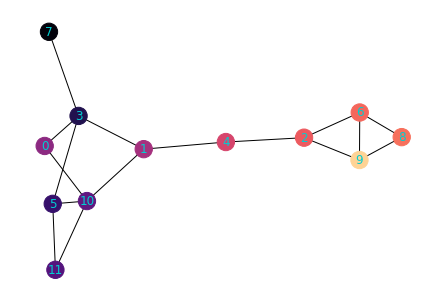

In [6]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(12, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating an epoch with ABEBA model (with no Recommender):

  node label    opinion value
------------  ---------------
           0           -0.2
           1           -0.08
           2            0.3
           3           -0.72
           4            0.165
           5           -0.655
           6            0.366
           7           -0.96
           8            0.4
           9            0.833
          10           -0.421
          11           -0.465


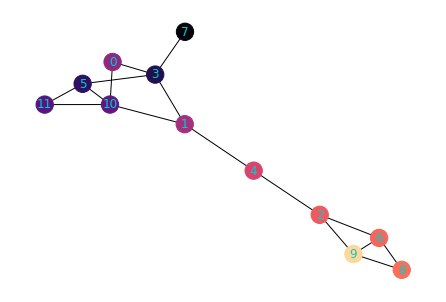

In [7]:
# Simulating an epoch and printing the opinion graph obtained
G = simulate_epoch_updated(G, 50, 50)
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Creation and print of a graph:

Starting graph: 
  node label    opinion value
------------  ---------------
           0            -0.58
           1            -0.66
           2             0.46
           3             0.64
           4            -0.28
           5             0.78
           6            -0.64
           7             0.92
           8             0.68
           9             0.18
          10            -0.94
          11            -0.2


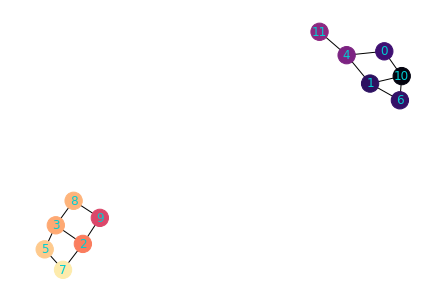

In [8]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(12, [1], avg_friend = 3, hp_alpha=5, hp_beta=0)
G = apply_initial_feed(G)
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating 100 updates of 2 graphs:
- Previous graph with no recommender
- Previous graph with random content recommender

Then showing the two graphs' opinions and their polarisation value.

  node label    opinion value
------------  ---------------
           0           -0.575
           1           -0.575
           2            0.763
           3            0.763
           4           -0.575
           5            0.763
           6           -0.575
           7            0.763
           8            0.763
           9            0.763
          10           -0.575
          11           -0.575


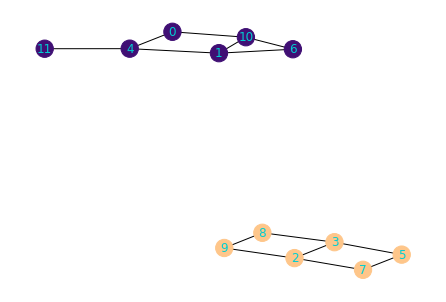

  node label    opinion value
------------  ---------------
           0            0.035
           1           -0.082
           2            0.405
           3            0.395
           4            0.116
           5            0.178
           6            0.386
           7            0.031
           8            0.69
           9            0.178
          10            0.1
          11            0.063


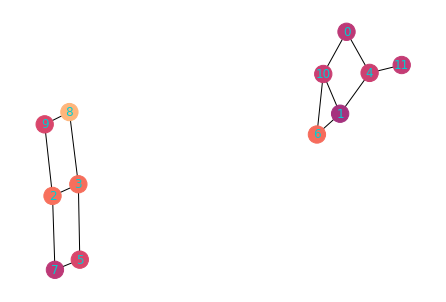

Polarisation (no recommender): 5.365662591564778
Polarisation (content recommender): 0.5267080704627625


In [9]:
# Simulating an epoch and printing the opinion graph obtained
cont_G = G.copy()
for i in range(100):
  G = simulate_epoch_updated(G, 50, 50)
  cont_G = simulate_epoch_content_recommender(cont_G, 50, 50)

# Showing graph with no recommender and its nodes' opinions
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(cont_G, 'opinion').values())
labels =  nx.get_node_attributes(cont_G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(cont_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

print(f"Polarisation (no recommender): {polarisation(G)}")
print(f"Polarisation (content recommender): {polarisation(cont_G)}")